## Exploratory Data Analysis with Python and SQL Language

In this Mini-Project we will present a basic guide to exploratory data analysis using Python Language, SQL Language and SQLite Database. We will use real data, available on <a href="https://www.imdb.com/interfaces/">IMDB</a>.


By applying Exploratory Data Analysis we will answer these 10 questions:

- 1- What Are the Most Common Movie Categories on IMDB?
- 2- How Many Titles By Genre?
- 3- What is the Median Rating of Movies by Genre?
- 4- What is the Median Rating of Movies Regarding the Year of Premiere?
- 5- What is the Number of Movies Rated by Genre in relation to the year of release?
- 6- What is the longest running movie?
- 7- What is the Relationship Between Duration and Genre?
- 8- What is the Number of Movies Produced by Country?
- 9- What Are the Top 10 Best Movies?
- 10- What are the Top 10 Worst Movies?

## Installing and Loading Packages

In [115]:
# Python version
from platform import python_version
print('Python Language Version Used In This Jupyter Notebook:', python_version())

Python Language Version Used In This Jupyter Notebook: 3.9.7


In [2]:
# Installing package
!pip install -q imdb-sqlite

Now we run the package to download the datasets.

In [3]:
# Installing package
!pip install -q pycountry

In [4]:
# Imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Loading the Data

In [ ]:
%%time
!imdb-sqlite

In [7]:
# Connect to the database
conn = sqlite3.connect("imdb.db")

In [8]:
# Extract the list of tables
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [9]:
# Object type
type(tabelas)

pandas.core.frame.DataFrame

In [10]:
# View the result
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [11]:
# Converting the dataframe to a list
tabelas = tabelas["Table_Name"].values.tolist()

In [13]:
# Let's go through the list of tables in the database and extract the schema of each one

for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Table schema:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Table schema: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Table schema: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Table schema: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




> Now we begin Exploratory Data Analysis.

## 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [14]:
# Create the SQL query
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [15]:
# Extract the result
resultado1 = pd.read_sql_query(consulta1, conn)

In [16]:
# View the result
display(resultado1)

,type,COUNT
0,movie,614995
1,short,878376
2,tvEpisode,6813339
3,tvMiniSeries,44203
4,tvMovie,136703
5,tvPilot,2
6,tvSeries,227853
7,tvShort,10606
8,tvSpecial,37573
9,video,262631


In [17]:
# Let's calculate the percentage for each type
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [18]:
# View the result
display(resultado1)

,type,COUNT,percentual
0,movie,614995,6.789647
1,short,878376,9.697417
2,tvEpisode,6813339,75.220392
3,tvMiniSeries,44203,0.488008
4,tvMovie,136703,1.509224
5,tvPilot,2,0.000022
6,tvSeries,227853,2.515535
7,tvShort,10606,0.117092
8,tvSpecial,37573,0.414812
9,video,262631,2.899490


In [19]:
# Let's create a chart with only 4 categories:
# The 3 categories with the most titles and 1 category with everything else

# Create an empty dictionary
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Set the name
others['type'] = 'others'

In [20]:
# View
others

{'COUNT': 751125, 'percentual': 8.292544520848526, 'type': 'others'}

In [21]:
# 
Filter the result dataframe
resultado1 = resultado1[resultado1['percentual'] > 5]

In [22]:
# Append with dataframe from other categories
resultado1 = resultado1.append(others, ignore_index = True)

In [23]:
# Orders the result
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [24]:
# View
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6813339,75.220392
1,short,878376,9.697417
3,others,751125,8.292545
0,movie,614995,6.789647


In [25]:
# Adjust the labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

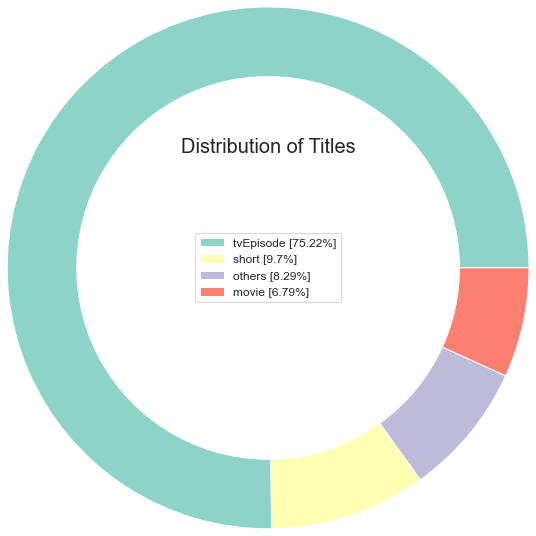

In [28]:
# Plot

# Color map
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Create the figure
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribution of Titles", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- How Many Titles By Genre?


In [29]:
# Create the SQL query
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [30]:
# Result
resultado2 = pd.read_sql_query(consulta2, conn)

In [31]:
# View the result
display(resultado2)

,genres,COUNT(*)
0,Action,14103
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1465,"Thriller,Western",43
1466,War,1300
1467,"War,Western",14
1468,Western,5103


In [32]:
# Convert strings to lowercase
resultado2['genres'] = resultado2['genres'].str.lower().values

In [33]:
# Remove NA values (missing)
temp = resultado2['genres'].dropna()

Using Countvectorizer to convert the genres column into a one-hot encoded vector to count the number of movies in each genre.


In [34]:
# Let's create an array using regular expression to filter the strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [35]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [36]:
# Applies vectorization to dataset without NA values
bag_generos = vetor.transform(temp)

In [37]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [38]:
# Returns unique genres
generos_unicos =  vetor.get_feature_names()

In [39]:
# Create the genres dataframe
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [40]:
# View
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1470 non-null   int64
 1   adult        1470 non-null   int64
 2   adventure    1470 non-null   int64
 3   animation    1470 non-null   int64
 4   biography    1470 non-null   int64
 5   comedy       1470 non-null   int64
 6   crime        1470 non-null   int64
 7   documentary  1470 non-null   int64
 8   drama        1470 non-null   int64
 9   family       1470 non-null   int64
 10  fantasy      1470 non-null   int64
 11  film-noir    1470 non-null   int64
 12  game-show    1470 non-null   int64
 13  history      1470 non-null   int64
 14  horror       1470 non-null   int64
 15  music        1470 non-null   int64
 16  musical      1470 non-null   int64
 17  mystery      1470 non-null   int64
 18  n            1470 non-null   int64
 19  news         1470 non-null   int64
 20  reality-

In [41]:
# Drop n column
generos = generos.drop(columns = 'n', axis = 0)

In [42]:
# Calculate the percentage
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [43]:
# View
generos_percentual.head(10)

drama          17.891156
comedy         16.938776
documentary    15.782313
adventure      14.897959
action         14.557823
romance        13.265306
crime          12.993197
mystery        12.380952
thriller       12.312925
horror         12.176871
dtype: float64

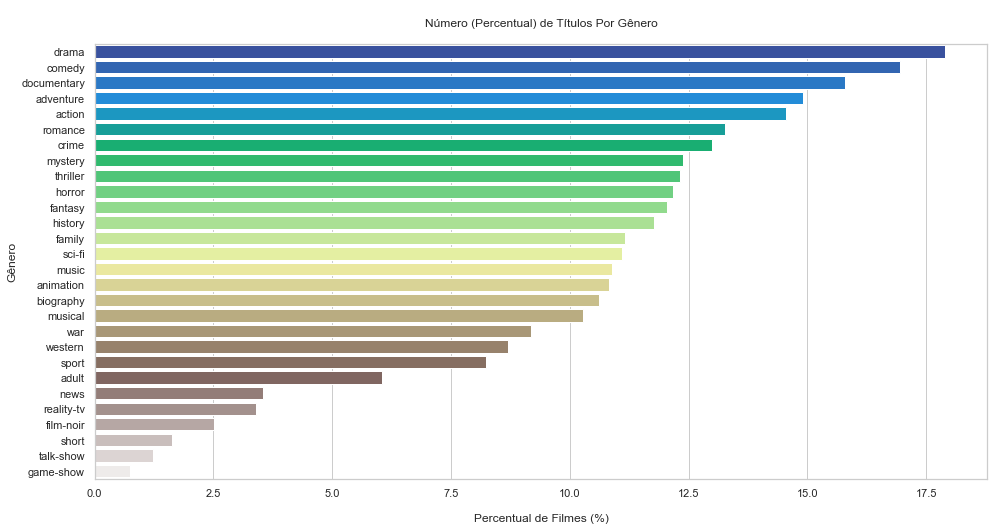

In [44]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## 3- What is the Median Rating of Movies by Genre?

In [45]:
# SQL Query
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 

In [46]:
# Result
resultado3 = pd.read_sql_query(consulta3, conn)

In [47]:
# View
display(resultado3)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.7,Drama
3,4.5,Drama
4,3.9,Drama
...,...,...
280542,5.8,Thriller
280543,6.4,"Drama,History"
280544,3.8,"Adventure,History,War"
280545,8.3,Drama


In [48]:
# Let's create a function to return the genres
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [49]:
# Applies the function
generos_unicos = retorna_generos(resultado3)

In [50]:
# View
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [51]:
# Create empty lists
genero_counts = []
genero_ratings = []

In [52]:
# Loop
for item in generos_unicos:
    
    # Returns movie count by genre
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Returns movie rating by genre
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [53]:
# Prepare the final dataframe
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [54]:
# View
df_genero_ratings.head(20)

,genres,count,rating
0,action,29109,5.80
1,adult,4392,5.80
2,adventure,17614,6.00
3,animation,4817,6.50
4,biography,8560,7.00
5,comedy,69298,6.00
6,crime,23992,6.10
7,documentary,42077,7.30
8,drama,124215,6.30
9,family,10828,6.30


In [55]:
# Drop index 18 (news)
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [56]:
# Order the result
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

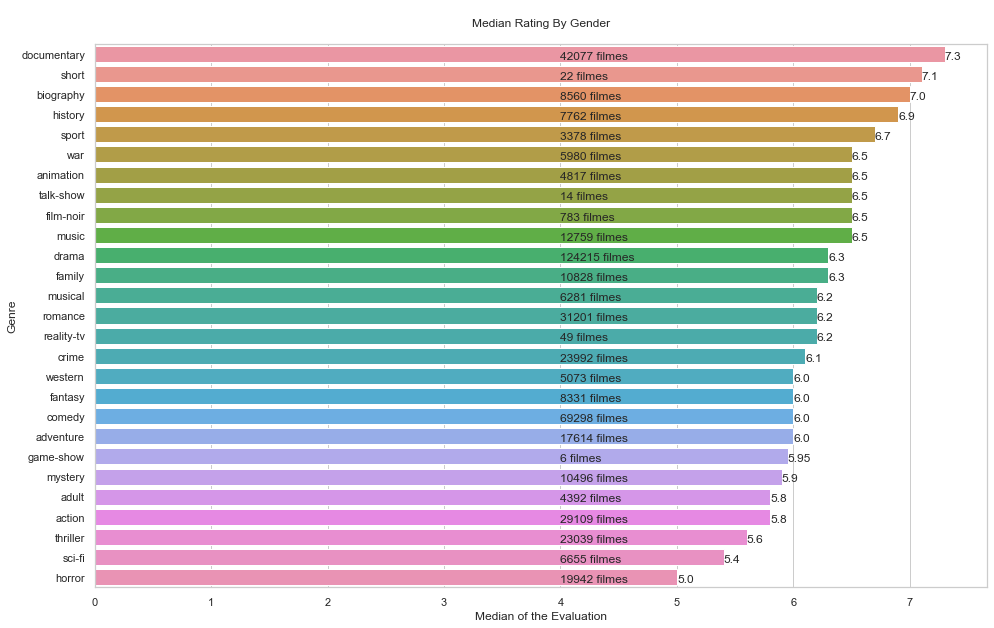

In [58]:
# Plot

# Figure
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Graph texts
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Genre')             
plt.xlabel('Median of the Evaluation')
plt.title('\nMedian Rating By Gender\n')
plt.show()

## 4-  What is the Median Rating of Movies Regarding the Year of Premiere?

In [59]:
# SQL Query
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 

In [60]:
# Result
resultado4 = pd.read_sql_query(consulta4, conn)

In [61]:
display(resultado4)

,Rating,premiered
0,6.7,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
280542,9.5,2022
280543,7.8,2022
280544,6.8,2022
280545,5.0,2022


In [62]:
# We calculate the median over time (years)
ratings = []
for year in set(resultado4['premiered']):
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating']))

In [63]:
type(ratings)

list

In [64]:
ratings[1:10]

[4.5, 3.85, 5.85, 6.2, 3.4, 4.6, 5.3, 4.55, 3.6]

In [65]:
# List of years
anos = list(set(resultado4['premiered']))

In [66]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

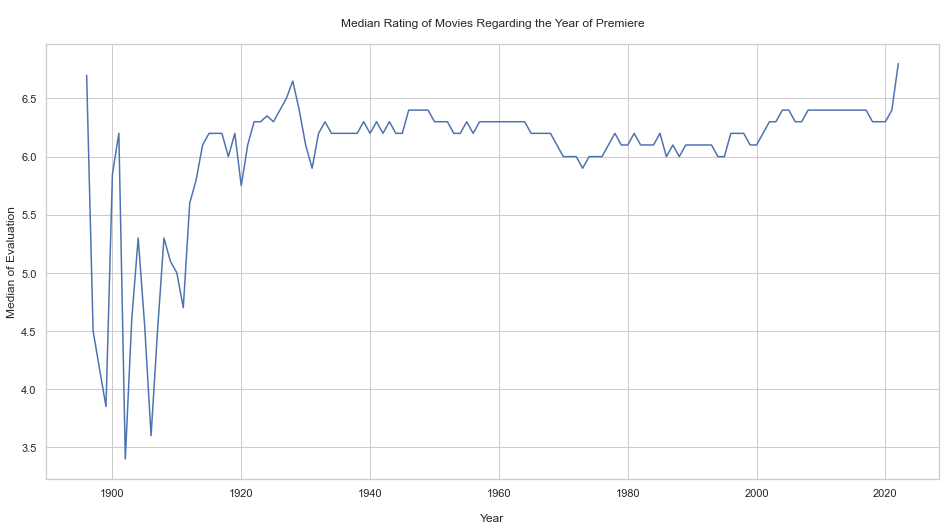

In [69]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nYear')
plt.ylabel('Median of Evaluation')
plt.title('\nMedian Rating of Movies Regarding the Year of Premiere\n')
plt.show()

## 5- What is the Number of Movies Rated by Genre in relation to the year of release?

In [70]:
# SQL Query
consulta5 = '''SELECT genres FROM titles ''' 

In [71]:
# Result
resultado5 = pd.read_sql_query(consulta5, conn)

In [72]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
9057830,"Action,Drama,Family"
9057831,"Action,Drama,Family"
9057832,"Action,Drama,Family"
9057833,Short


In [73]:
# Returns unique genres
generos_unicos = retorna_generos(resultado5)

In [74]:
# View the result
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [75]:
# Now doing the count
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [76]:
# Prepararing the dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [77]:
# Calculate the top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

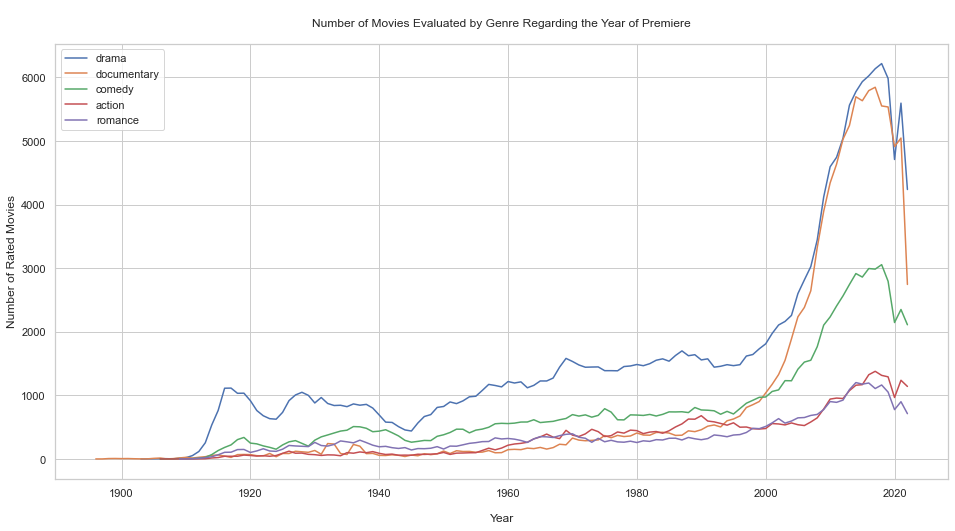

In [78]:
# Plot

# Figure
plt.figure(figsize = (16,8))

# Loop and Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nYear')
plt.ylabel('Number of Rated Movies')
plt.title('\nNumber of Movies Evaluated by Genre Regarding the Year of Premiere\n')
plt.legend(labels = top_generos)
plt.show()

## 6- What is the longest running movie? Calculate the percentiles.

Percentiles and longest movie in history.

In [79]:
# SQL Query
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [80]:
# Result
resultado6 = pd.read_sql_query(consulta6, conn)

In [81]:
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
387893,123
387894,57
387895,100
387896,116


In [82]:
# Loop for calculating percentiles
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 51.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 57.0
11 percentil da duração (runtime) é: 58.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 62.0
17 percentil da duração (runtime) é: 64.0
18 percentil da duração (runtime) é: 65.0
19 percentil da duração (runtime) é: 67.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 71.0
24 

In [83]:
# Redoing the query and returning the movie with the longest duration
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 

In [84]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [85]:
resultado6

,Runtime,primary_title
0,51420,Logistics


'Logistics' is the longest film in history (up to this point), with 857 hours (51420 minutes). Directed by Daniel Andersson and Erika Magnusson, the movie follows the entire life cycle of a pedometer (step tracking device) in reverse chronological order.

## 7- What is the Relationship Between Duration and Genre?

In [86]:
# SQL Query
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [87]:
# Result
resultado7 = pd.read_sql_query(consulta7, conn)

In [88]:
# Returns unique genres
generos_unicos = retorna_generos(resultado7)

In [89]:
# View
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [90]:
# Calculate duration by gender
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [91]:
# Prepare the dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [92]:
# Remove index 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [93]:
# Data ordering
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

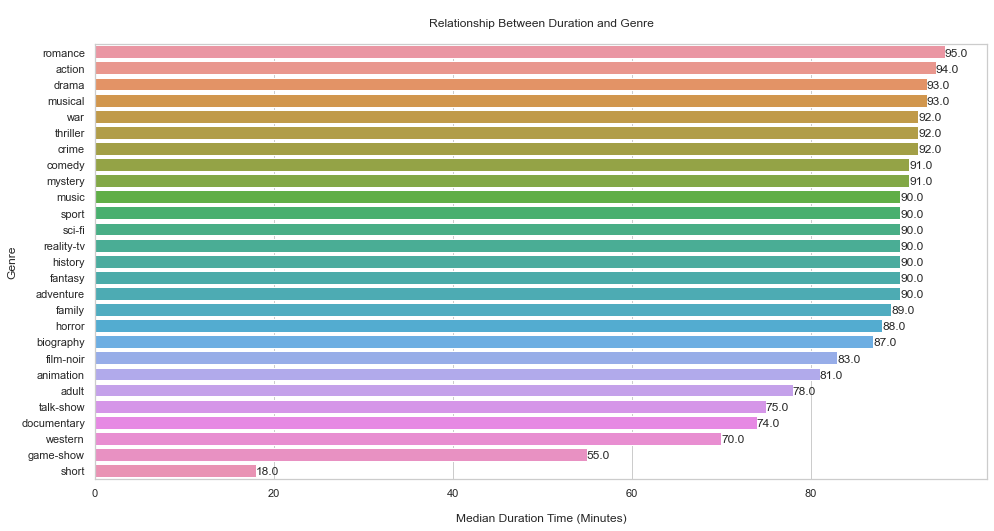

In [95]:
# Plot

# Image size
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Genre')             
plt.xlabel('\nMedian Duration Time (Minutes)')
plt.title('\nRelationship Between Duration and Genre\n')
plt.show()

## 8- What is the Number of Movies Produced by Country?

In [96]:
# SQL Query
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [97]:
# Result
resultado8 = pd.read_sql_query(consulta8, conn)

In [98]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,6853
2,AF,114
3,AG,12
4,AL,1290
...,...,...
229,YUCS,153
230,ZA,5125
231,ZM,15
232,ZRCD,2


In [99]:
# Shape
resultado8.shape

(234, 2)

In [100]:
# Number of Lines
resultado8.shape[0]

234

In [101]:
# Auxiliary lists
nomes_paises = []
contagem = []

In [103]:
# Loop to get country according to region
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [104]:
# Preparing the dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [105]:
# Order the result
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [106]:
# View
df_filmes_paises.head(10)

,country,Movie_Count
412,United States,314697
199,United States,314697
65,United Kingdom,160704
278,United Kingdom,160704
96,Japan,92132
309,Japan,92132
63,France,85655
276,France,85655
89,India,83612
302,India,83612


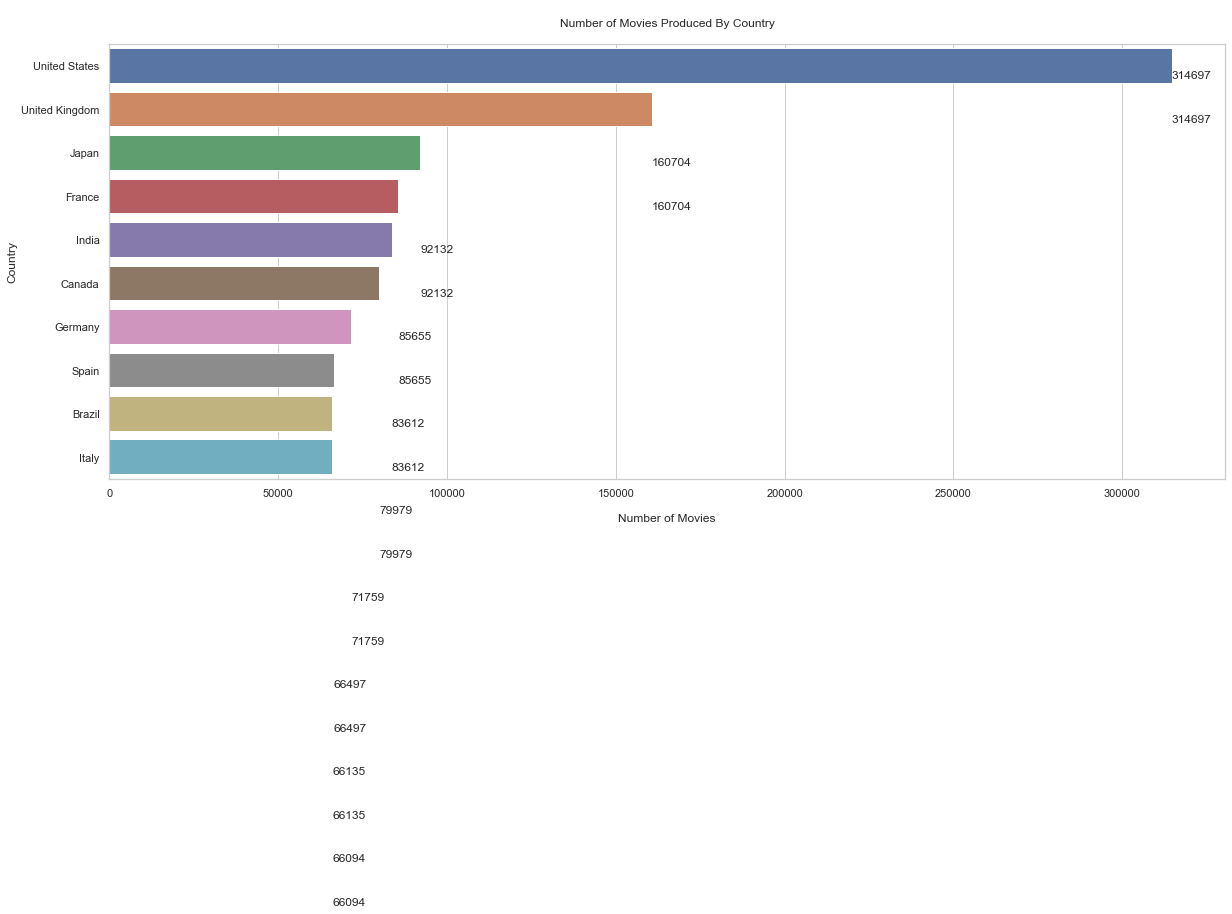

In [108]:
# Plot

# Figure
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('Country')             
plt.xlabel('\nNumber of Movies')
plt.title('\nNumber of Movies Produced By Country\n')
plt.show()

## 9- What Are the Top 10 Best Movies?

In [109]:
# SQL Query
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 

In [110]:
# Result
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [111]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,The Shawshank Redemption,Drama,9.3
1,The Chaos Class,"Comedy,Drama",9.3
2,The Godfather,"Crime,Drama",9.2
3,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
4,12 Angry Men,"Crime,Drama",9.0
5,The Godfather: Part II,"Crime,Drama",9.0
6,Schindler's List,"Biography,Drama,History",9.0
7,The Lord of the Rings: The Return of the King,"Action,Adventure,Drama",9.0
8,The Dark Knight,"Action,Crime,Drama",9.0
9,Mirror Game,"Crime,Mystery,Thriller",9.0


## 10- What are the Top 10 Worst Movies?

In [112]:
# SQL Query
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [113]:
# Result
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [114]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Reis,"Biography,Drama",1.0
1,Cumali Ceber,Comedy,1.0
2,Sadak 2,"Action,Drama",1.1
3,Smolensk,"Drama,Thriller",1.2
4,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.5
5,The Cost of Deception,"Crime,Drama,History",1.5
6,Manos: The Hands of Fate,Horror,1.6
7,Justin Bieber: Never Say Never,"Documentary,Music",1.6
8,From Justin to Kelly,"Comedy,Musical,Romance",1.9
9,The Hottie & the Nottie,"Comedy,Romance",1.9


The End
Project Made following Data Science Academy Tutorials